<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#Procesamiento-de-los-Datos---Municipios" data-toc-modified-id="Procesamiento-de-los-Datos---Municipios-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Procesamiento de los Datos - Municipios</a></span><ul class="toc-item"><li><span><a href="#Ejemplos-de-Limpieza-y-Manipulación" data-toc-modified-id="Ejemplos-de-Limpieza-y-Manipulación-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ejemplos de Limpieza y Manipulación</a></span></li><li><span><a href="#Ejemplos-de-Queries-con-SQL" data-toc-modified-id="Ejemplos-de-Queries-con-SQL-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ejemplos de Queries con SQL</a></span></li></ul></li><li><span><a href="#Procesamiento-de-Datos---Advertising" data-toc-modified-id="Procesamiento-de-Datos---Advertising-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Procesamiento de Datos - Advertising</a></span></li></ul></div>

# Manipulación de Datos con Pandas

En este notebook se pretende resumir de manera general el manejo de bases de datos con `pandas`.

Este notebook hace parte (y es el comienzo) de la serie de notebooks y scripts del curso de __Tópicos de Estadística Avanzada (DS y ML)__ tomado en la Universiad Nacional de Colombia.

## Librerías 

En esta seccion se importan las librerías y modulos que se van a usar a lo largo del notebook.

In [35]:
# Se importan modelos y funciones param mostrar imagenes
from IPython.display import Image
from IPython.core.display import HTML 

# Librerias para la regresión lineal
import pandas as pd
import pandasql as ps
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

## Procesamiento de los Datos - Municipios

En esta sección se leen los datos que servirán de ejemplo.

In [18]:
# Define la ruta de imagenes y de datos
ruta_dta = '../Data/Data Manipulation Pandas/'
ruta_img = '../Imagenes/Data Manipulation Pandas/'

In [19]:
# Lee el excel de municipios y especifica el tipo de datos de algunas de las columnas
municipios = pd.read_excel(ruta_dta + 'Municipios.xlsx', dtype={'Dep': str, 'Depmun': str, 'Irural': float, 
                                                                'Poblacion': float})
print('INFORMACION DEL DATASET: \n')
municipios.info()

INFORMACION DEL DATASET: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  1118 non-null   object 
 1   Dep           1118 non-null   object 
 2   Municipio     1118 non-null   object 
 3   Depmun        1118 non-null   object 
 4   Superficie    1117 non-null   float64
 5   Poblacion     1118 non-null   float64
 6   Irural        1118 non-null   float64
 7   Region        1118 non-null   object 
dtypes: float64(3), object(5)
memory usage: 70.0+ KB


### Ejemplos de Limpieza y Manipulación

In [20]:
# Cantidad y porcentaje de valores nulos por columna del datset
def missings(x):
            a = x.isna().sum()
            b = 100*x.isna().mean()
            c = pd.Series({"MISSINGS": a,"% OF MISSINGS": b})
            return(c)

municipios.apply(missings)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
MISSINGS,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
% OF MISSINGS,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00


In [21]:
# Correji y quita ciertos caracteres de la columna de municipios
municipios["Municipio2"] = (municipios["Municipio"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","",regex=True)
                            .str.replace(" +"," ",regex=True)
                            .str.strip()
                            .str.title()
                           ) 
print(municipios[["Municipio","Municipio2"]].head(n=2))
municipios["Municipio"] = municipios["Municipio2"]
municipios.drop(columns="Municipio2", inplace=True)

        Municipio Municipio2
0      Mede&l'lín   Medellín
1   Abej!&orr*al   Abejorral


In [24]:
# Correji y quita ciertos caracteres de la columna de departamentos
municipios["Departamento2"] = (municipios["Departamento"]
                               .str.lower()
                               .str.replace("[^a-záéíóúüñ ]","",regex=True)
                               .str.replace(" +"," ",regex=True)
                               .str.strip()
                               .str.title()
                              ) 
print(municipios[["Departamento","Departamento2"]].head(n=2))

municipios["Departamento"] = municipios["Departamento2"]
municipios.drop(columns="Departamento2",inplace=True)

  Departamento Departamento2
0    Antioquia     Antioquia
1    Antioquia     Antioquia


In [26]:
# Tipo de municipio e imprime el head de municipios capitales
def tipo(x): 
    if x[2:5]=="001" and x!="25001": return("Capital")
    else: return("Otros")
municipios["Tipo"] = municipios["Depmun"].apply(tipo)
municipios.query("Tipo=='Capital'").head(n=2)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital
125,Atlántico,08,Barranquilla,08001,154.20,"1,243,056.00",3.00,Región Caribe,Capital


In [27]:
# Tipo de municipio rural o urbano e imprime el head de municipios
municipios["denspobl"] = municipios["Poblacion"]/municipios["Superficie"]

def zona(x): 
    if x  > 40: return("Rural")
    if x <= 40: return("Urbano")
municipios["Zona"] = municipios["Irural"].apply(zona)
municipios.head(n=2)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital,"6,625.78",Urbano
1,Antioquia,05,Abejorral,05002,507.13,"20,258.00",45.00,Región Eje Cafetero,Otros,39.95,Rural


### Ejemplos de Queries con SQL

In [29]:
# Se hace una consulta de SQL a la data de municipios
E1 = ps.sqldf("""select   Departamento, Dep, Depmun, Municipio, Superficie, Poblacion
                 from     municipios
                 where    Dep in ('05','17') and Poblacion > 20000
                 order by Dep asc, Poblacion desc""")
E1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  66 non-null     object 
 1   Dep           66 non-null     object 
 2   Depmun        66 non-null     object 
 3   Municipio     66 non-null     object 
 4   Superficie    66 non-null     float64
 5   Poblacion     66 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.2+ KB


In [30]:
# Se hace la misma consulta con .loc y otros metodos de un pd.DataFrame
e1 = (municipios
      .loc[:,["Departamento", "Dep", "Depmun", "Municipio", "Superficie", "Poblacion"]] 
      .query("Poblacion > 20000 and Dep in ('05','17')")
      .sort_values(by=["Dep","Poblacion"],ascending=[True,False])
      .reset_index(drop=True)
     )

E1.equals(e1)

True

In [33]:
E11 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob, 
                           sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                  from     municipios
                  where    Irural > 40
                  group by Dep, Departamento
                  having   totpob >= 650000 and totsup >= 10000
                  order by denspob desc""")
E11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dep           7 non-null      object 
 1   Departamento  7 non-null      object 
 2   nmunicipios   7 non-null      int64  
 3   totpob        7 non-null      float64
 4   totsup        7 non-null      float64
 5   denspob       7 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 464.0+ bytes


In [34]:
e11 = (municipios
       .query("Irural > 40")
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True)
      ) 

E11.equals(e11)

True

In [31]:
Repetidos = ps.sqldf("""select   Municipio, count(*) as veces
                        from     municipios
                        group by Municipio
                        having   veces > 1
                        order by veces desc""")

E12 = ps.sqldf("""select   Municipio, Departamento, Dep, Depmun
                  from     municipios
                  where    Municipio in (select Municipio 
                                         from   Repetidos)
                  order by Municipio, Departamento""")

E12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Municipio     157 non-null    object
 1   Departamento  157 non-null    object
 2   Dep           157 non-null    object
 3   Depmun        157 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


In [32]:
Repetidos = (municipios
             .groupby("Municipio")
             .agg(reps=("Municipio","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["Municipio"]

e12 = (municipios
       .loc[:,["Municipio", "Departamento", "Dep", "Depmun"]] 
       .query("Municipio in @reps")
       .sort_values(by=["Municipio", "Departamento"],ascending=[True,True]).reset_index(drop=True)
      )

E12.equals(e12)

True

## Procesamiento de Datos - Advertising

En esta sección se implementan algunas gráficas para data de publicidad usando librerías como `seaborn` y `matplotlib`.

In [36]:
# Lee la data de publicdiad 
Advertising = pd.read_excel("../Data/Data Manipulation Pandas/Advertising.xlsx")
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


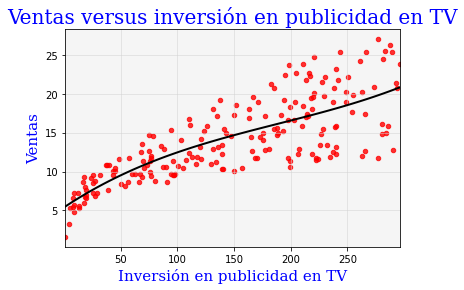

In [37]:
# Grafica de inversion sobre ventas
fig = sns.regplot(x="TV",y="sales",data=Advertising,order=3,marker="o",
                  scatter_kws={"s":20,"color":"red"},line_kws={"ls":"solid","lw":2,"color":"black"},ci=None)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"blue","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"blue","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"blue","size":20},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
fig.patch.set_facecolor("whitesmoke")
plt.show(fig)

In [39]:
cats = 3
bins = Advertising["radio"].quantile(np.arange(0,cats+1)/cats) 
Advertising["radioC"] = pd.cut(Advertising["radio"],bins,labels=["Baja","Media","Alta"])

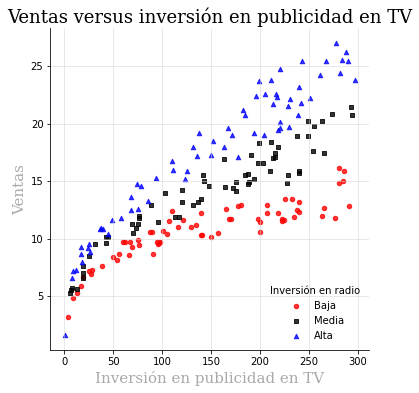

In [40]:
fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,fit_reg=False,
                 line_kws={"ls":"solid","lw":2})
plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

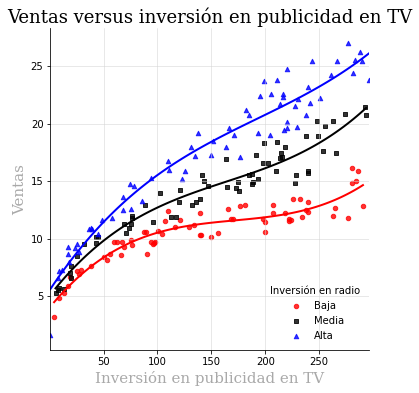

In [41]:
fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,
                 line_kws={"ls":"solid","lw":2})
plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

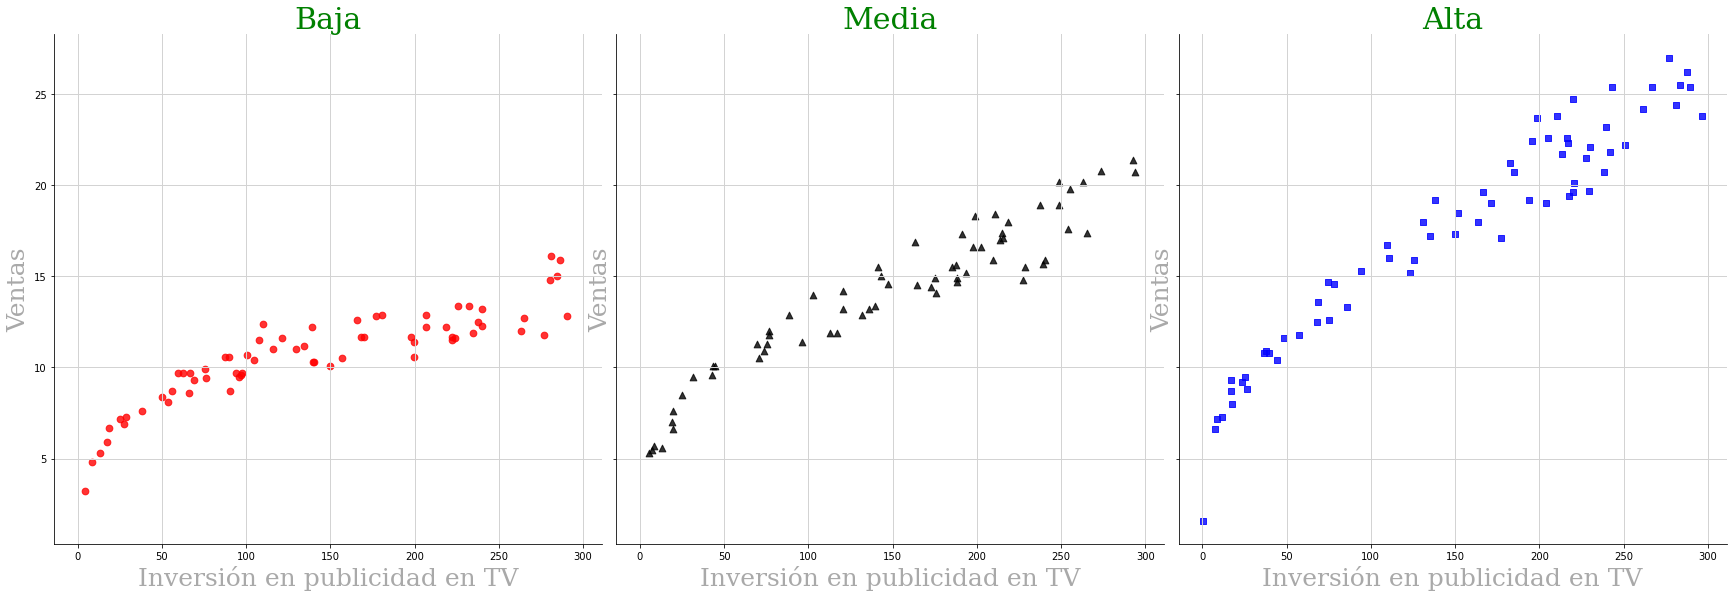

In [42]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=3,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None,fit_reg=False)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

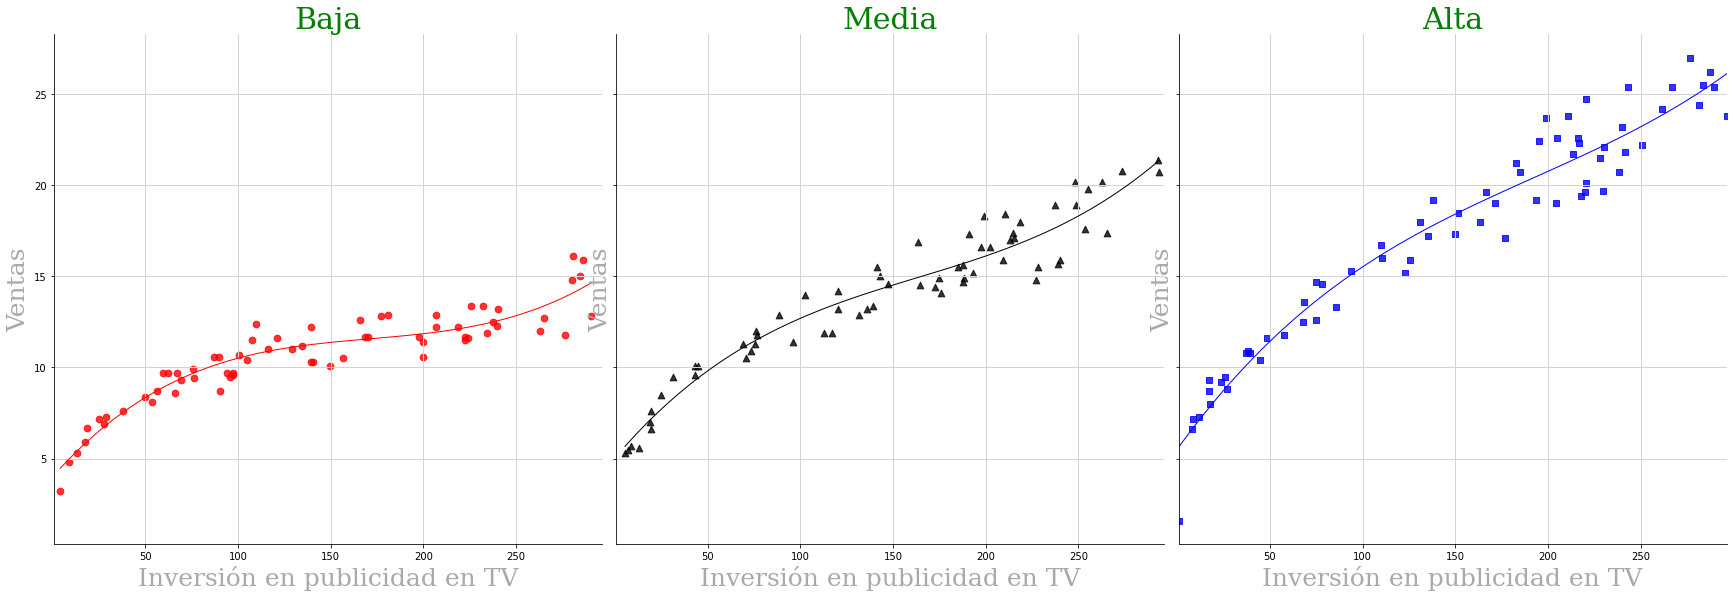

In [43]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=3,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

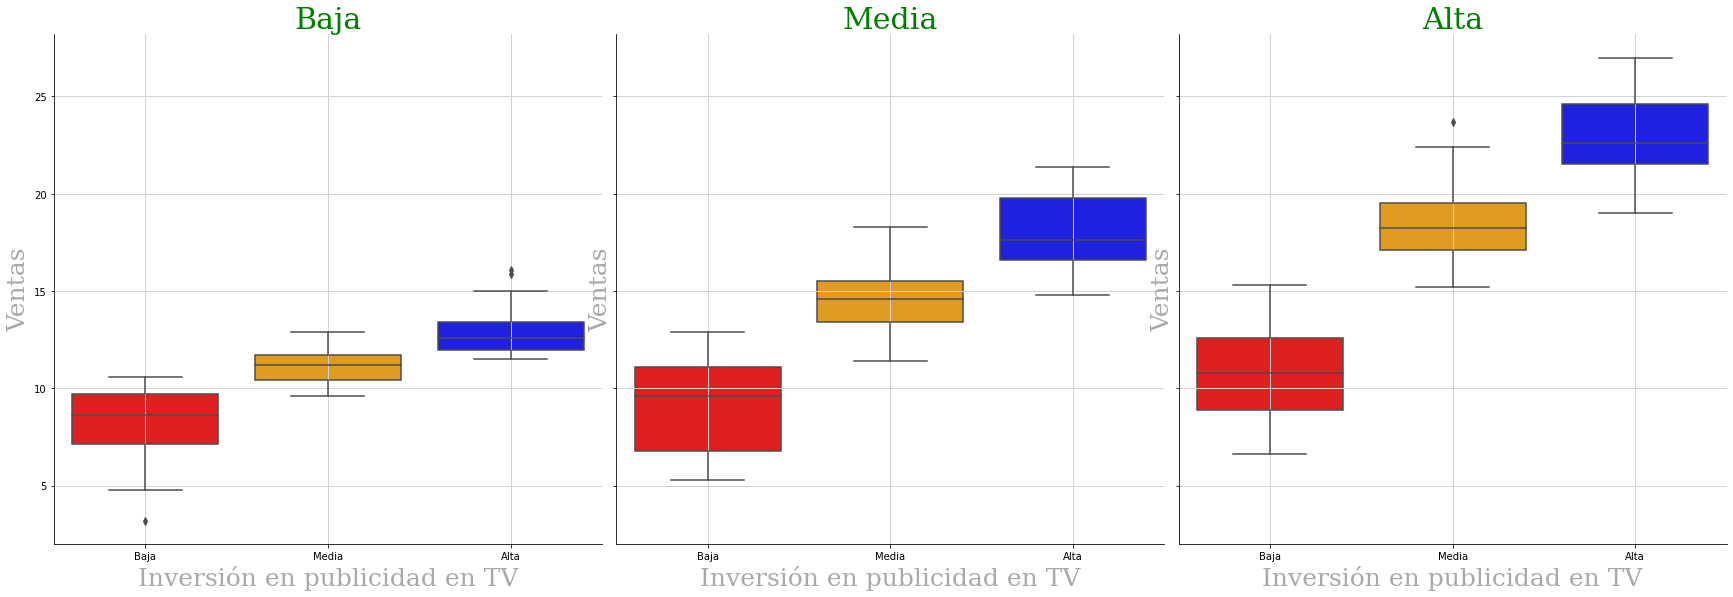

In [46]:
cats = 3
bins = Advertising["TV"].quantile(np.arange(0,cats+1)/cats) 
Advertising["TVC"] = pd.cut(Advertising["TV"],bins,labels=["Baja","Media","Alta"])
g = sns.FacetGrid(data=Advertising,col="radioC",sharey=True,height=8)
g.map(sns.boxplot,"TVC","sales",order=titulos,palette=dict(Baja="red",Media="orange",Alta="blue"),linewidth=1.5)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

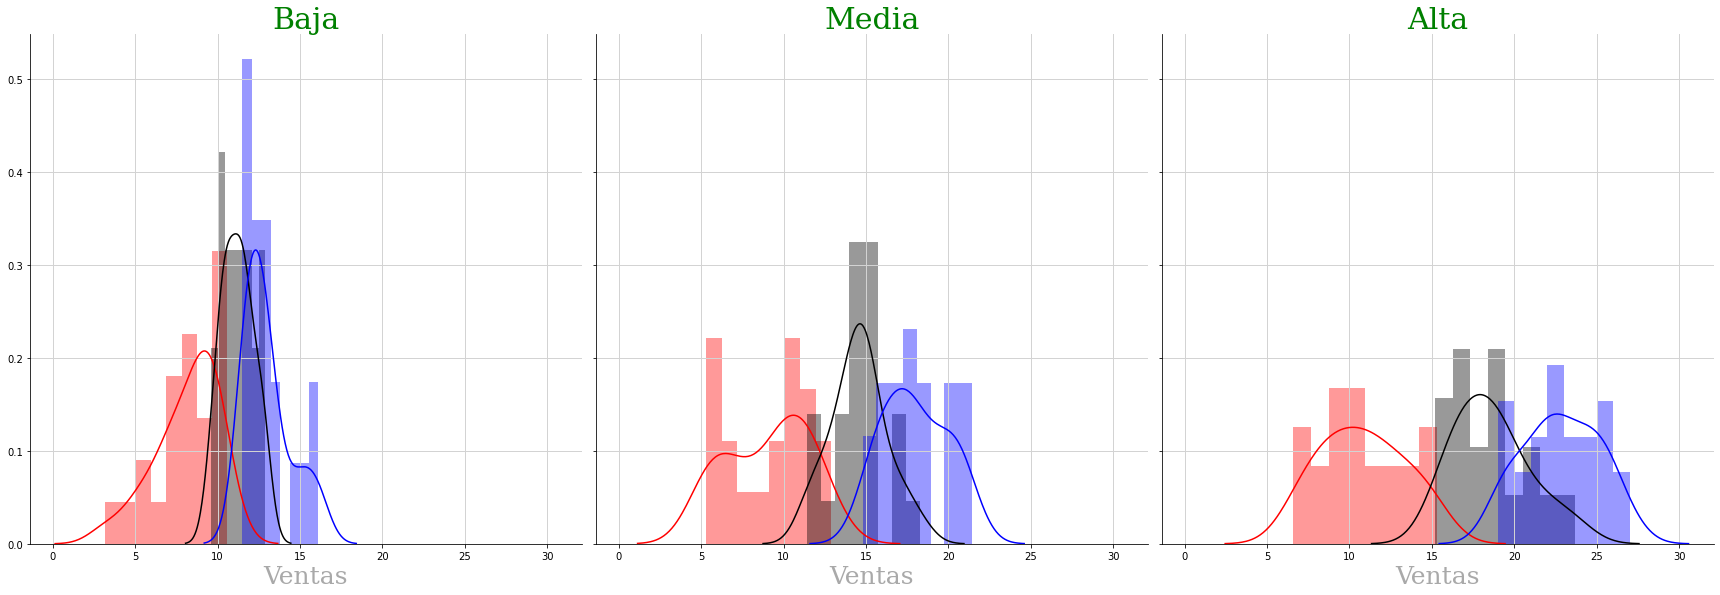

In [48]:
import warnings
warnings.filterwarnings("ignore")
g = sns.FacetGrid(data=Advertising,col="radioC",hue="TVC",sharey=True,height=8,
                 hue_kws=dict(color=["red","black","blue"]))
g.map(sns.distplot,"sales",norm_hist=True,kde=True,bins=8)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

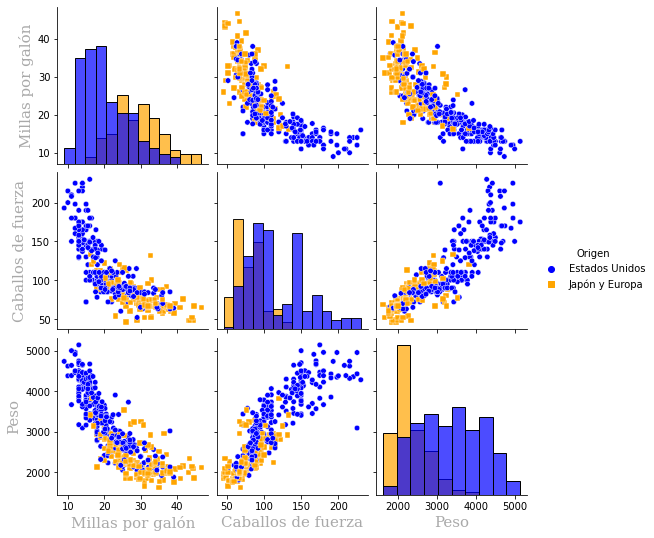

In [49]:
#sns.get_dataset_names()
cars = sns.load_dataset("mpg")
cars.loc[cars["origin"]=="usa","Origen"] = "Estados Unidos"
cars.loc[cars["origin"]!="usa","Origen"] = "Japón y Europa"

fig = sns.pairplot(cars, vars=["mpg","horsepower","weight"],hue="Origen",kind="scatter",
                   diag_kind="hist",palette=["blue","orange"],
                   markers=["o", "s"],plot_kws={"s":30},diag_kws={"alpha":0.7})
axes = fig.axes.flatten()
titulos = ["Millas por galón","Caballos de fuerza","Peso"]
c = np.sqrt(len(axes))
for ax1 in np.arange(0,c):
    for ax2 in np.arange(0,c):
        ax = int(ax1*c + ax2)
        if ax2 == 0: axes[ax].set_ylabel(titulos[int(ax1)],fontdict={"family":"serif","color":"darkgrey","size":15})
        if ax1 == c-1: axes[ax].set_xlabel(titulos[int(ax2)],fontdict={"family":"serif","color":"darkgrey","size":15})
plt.show(fig)

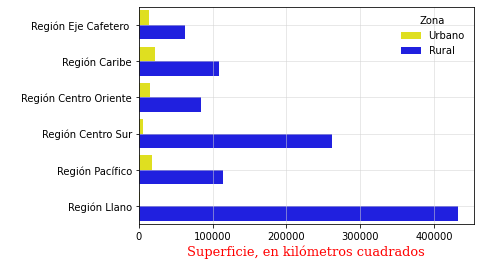

In [51]:
fig=sns.barplot(y="Region",x="Superficie",hue="Zona",data=municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Superficie, en kilómetros cuadrados",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

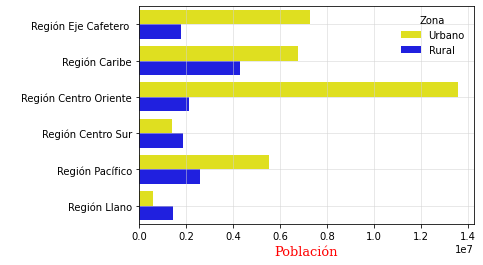

In [53]:
fig=sns.barplot(y="Region",x="Poblacion",hue="Zona",data=municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Población",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

# Final del Documento